In [1]:
import numpy as np
from scipy.fft import fft, ifft, fftshift
import matplotlib.pyplot as plt

In [2]:
L = 5.0
N = 100
dp = 2*L/N
plist = -L + np.arange(0,N)*dp
f = np.exp(-plist**2 + plist)
g = np.exp(-plist**4)

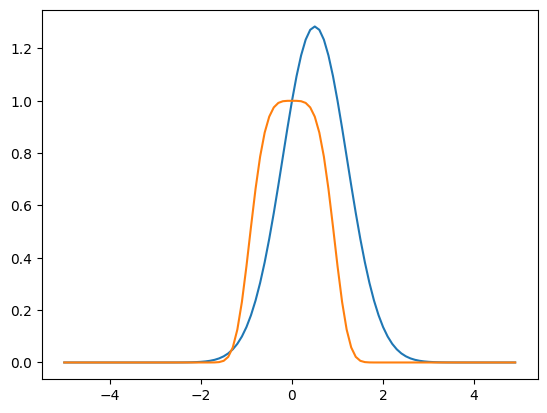

In [3]:
plt.plot(plist, f)
plt.plot(plist, g)
plt.show()

In [4]:
F = fft(f)
G = fft(g)

In [5]:
H = np.zeros(N, dtype=complex)
H[0] = F[0]*G[0]
for i in range(1, N):
    H[i] = F[i] * G[N-i]

In [6]:
h = ifft(H) * dp

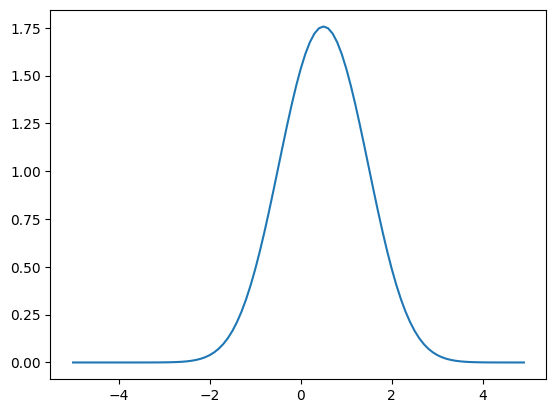

In [7]:
plt.plot(plist, fftshift(h.real))
plt.show()

In [8]:
ra = 1.2
rhb = 0.05
rgam = 0.0194
rgam1 = 6.85
rgam2 = 2.1
amee = 0.067
h2m02 = 3.80998
h2m2 = h2m02 / amee
aindb = 132.0
eryd = 4.2e-3

In [9]:
def fh(p):
    chie = h2m2*p*p
    chih = h2m02*p*p*(rgam1 - 2.0*rgam2)
    return np.exp(-(rhb - chie - chih)**2/2.0/rgam/rgam)

In [10]:
def fl(p):
    chie = h2m2*p*p
    chil = h2m02*p*p*(rgam1 + 2.0*rgam2)
    return np.exp(-(rhb - chie - chil)**2/2.0/rgam/rgam)

In [11]:
def f0(p, theta):
    return 1.0/6.0*ra*(3.0*fh(p)*(1-np.cos(theta)**2) + fl(p)*(1+3.0*np.cos(theta)**2))

In [32]:
hbar = 0.658212

In [35]:
hbar*hbar * 2.0 * np.log(2) / 40 /40

0.0003753764869437023

In [36]:
np.sqrt(hbar*hbar * 2.0 * np.log(2) / 40 /40)

0.01937463514349889

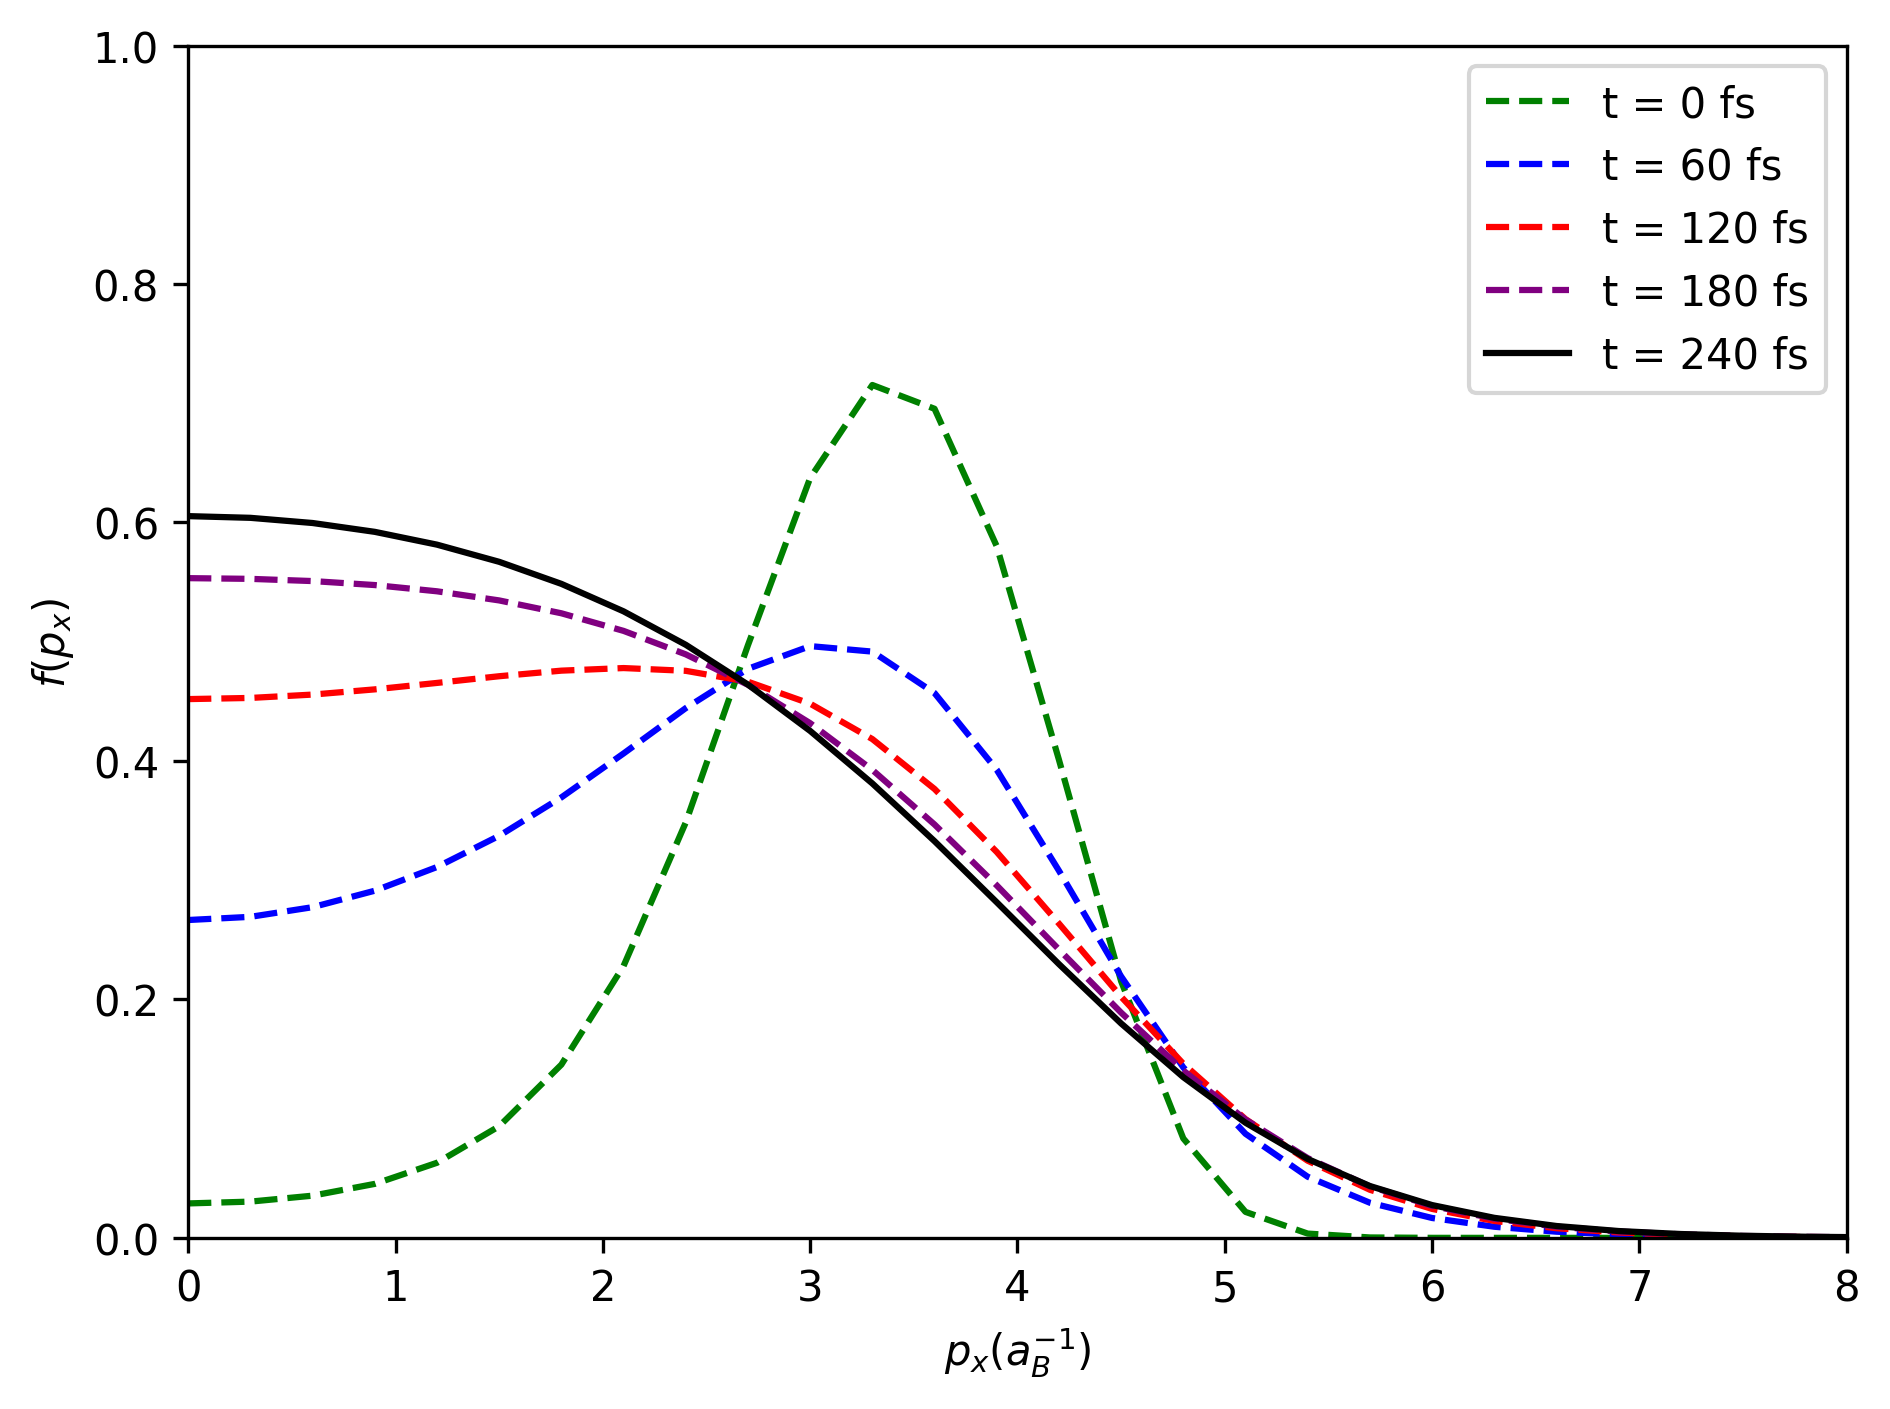

In [18]:
Npx = 28
dpx = 0.3/aindb
px = np.arange(0,Npx)*dpx

nfft = 60
fp0 = np.loadtxt("distribution_0").reshape((nfft, nfft, nfft))[:Npx, 0, 0]
fp1 = np.loadtxt("distribution_15").reshape((nfft, nfft, nfft))[:Npx, 0, 0]
fp2 = np.loadtxt("distribution_30").reshape((nfft, nfft, nfft))[:Npx, 0, 0]
fp3 = np.loadtxt("distribution_45").reshape((nfft, nfft, nfft))[:Npx, 0, 0]
fp4 = np.loadtxt("distribution_60").reshape((nfft, nfft, nfft))[:Npx, 0, 0]

#fp1_new = np.loadtxt("distribution_30_dt2").reshape((nfft, nfft, nfft))[:Npx, 0, 0]
#p2_new = np.loadtxt("distribution_60_dt2").reshape((nfft, nfft, nfft))[:Npx, 0, 0]
#fp3_new = np.loadtxt("distribution_90_dt2").reshape((nfft, nfft, nfft))[:Npx, 0, 0]
#fp4_new = np.loadtxt("distribution_120_dt2").reshape((nfft, nfft, nfft))[:Npx, 0, 0]

plt.figure(dpi=300)
plt.plot(px*aindb, fp0, ls='--', color='green', label="t = 0 fs")
plt.plot(px*aindb, fp1, ls='--', color='blue', label="t = 60 fs")
#plt.plot(px*aindb, fp1_new, ls='-', color='blue', label="t = 60 fs")
plt.plot(px*aindb, fp2, ls='--', color='red', label="t = 120 fs")
#plt.plot(px*aindb, fp2_new, ls='-', color='red', label="t = 120 fs")
plt.plot(px*aindb, fp3, ls='--', color='purple', label="t = 180 fs")
#plt.plot(px*aindb, fp3_new, ls='-', color='purple', label="t = 180 fs")
plt.plot(px*aindb, fp4, ls='-', color='black', label="t = 240 fs")
#plt.plot(px*aindb, fp4_new, ls='--', color='black', label="t = 240 fs")
plt.xlim(0,8)
plt.ylim(0.0, 1.0)
plt.legend()
plt.xlabel(u"$p_x(a_B^{-1})$")
plt.ylabel(u"$f(p_x)$")
plt.tight_layout()
#plt.savefig("fpx.png")
plt.show()

In [59]:
filein='distribution_45'
data = np.loadtxt(filein).reshape((60, 60, 60))[:,0,:]

In [60]:
Npx = 28
aindb = 132.0
dpx = 0.3
px = np.arange(0,Npx)*dpx

nfft = 60

In [61]:
px = dpx*(np.arange(0, nfft) - (np.arange(0, nfft) > nfft / 2)*nfft)

In [62]:
X, Y = np.meshgrid(px, px)

(-6.0, 6.0)

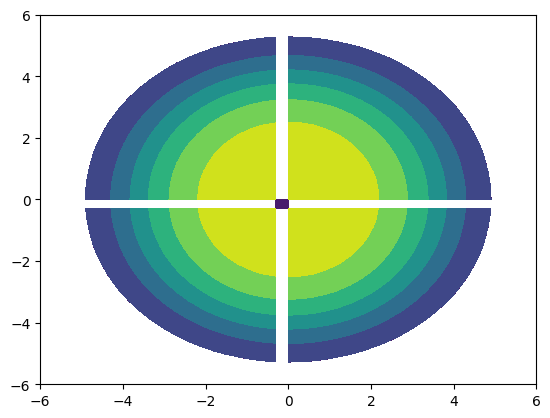

In [63]:
plt.contourf(X, Y, data)
plt.xlim(-6, 6)
plt.ylim(-6, 6)